# Activity 7: Feature Extraction

Submitted by Mary Franczine Tan | Student No. 2020-10177

Applied Physics 157, AY 2022-2023 2nd Semester

Submitted on June 19, 2023


In [56]:
# import libraries
 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
from skimage.measure import regionprops, label, regionprops_table

## Feature Extraction

### Segment Images

In [8]:
img = mpimg.imread('IMG_4860.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [27]:
kernel = np.ones((15,15), np.uint8)
step1 = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, kernel)
step2 = cv2.erode(step1, kernel)
segmented = cv2.dilate(step2, kernel)

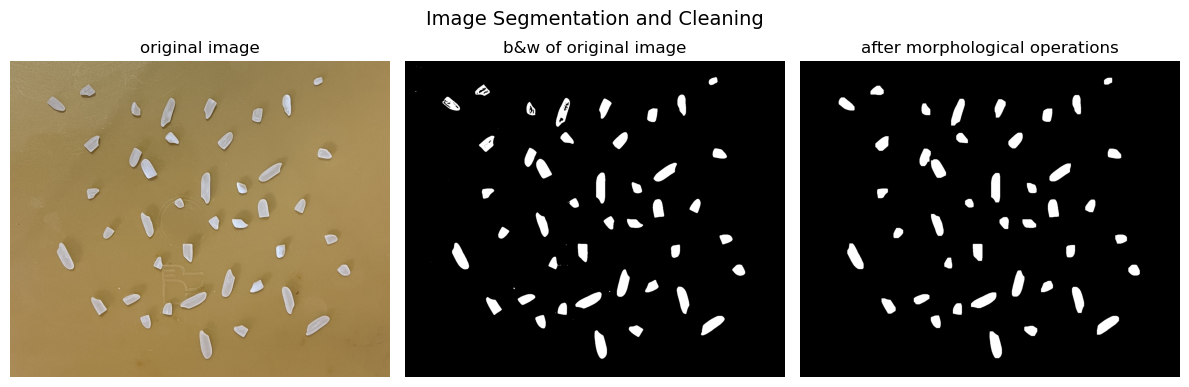

In [37]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].imshow(img)
ax[0].set_title('original image')
ax[1].imshow(th3, cmap = 'gray')
ax[1].set_title('b&w of original image')
ax[2].imshow(segmented, cmap = 'gray')
ax[2].set_title('after morphological operations')

for i in range(3):
    ax[i].axis('off')
    
plt.suptitle('Image Segmentation and Cleaning', size = 14)
plt.tight_layout()

### Extract Features

(-0.5, 1719.5, 1430.5, -0.5)

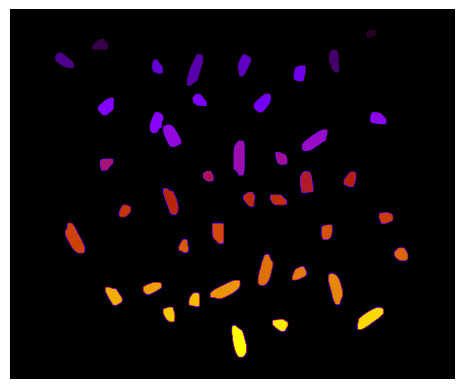

In [88]:
labeled = label(segmented)

plt.imshow(labeled, cmap = 'gnuplot')
plt.axis('off')

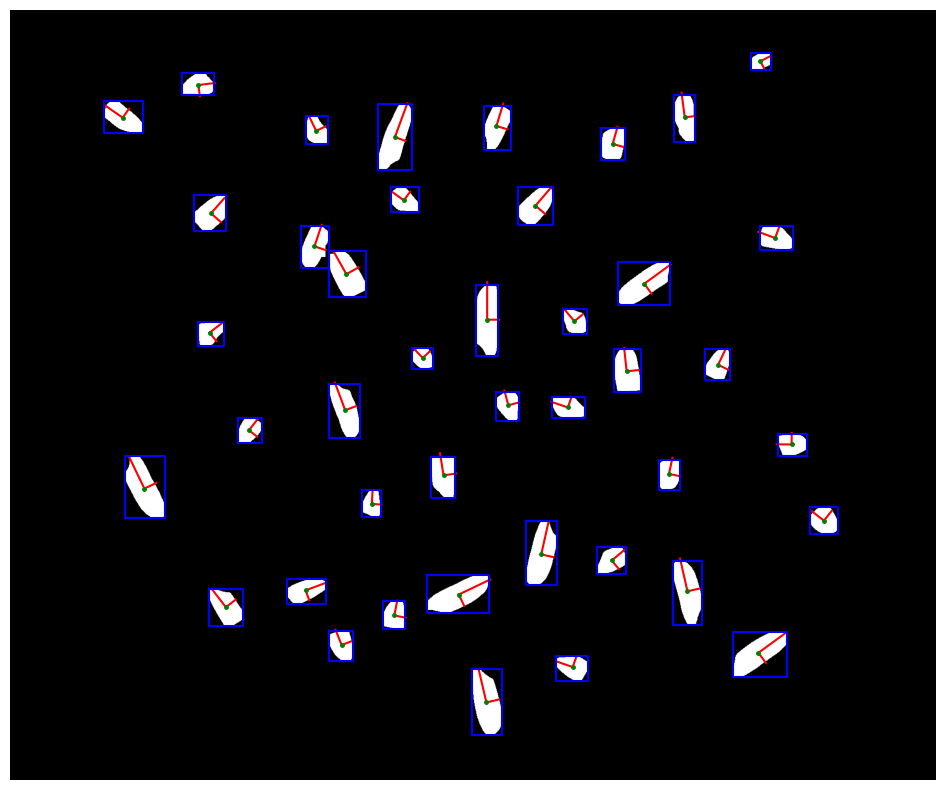

In [85]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.imshow(segmented, cmap=plt.cm.gray)

regions = regionprops(labeled)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=1.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=1.5)
    ax.plot(x0, y0, '.g', markersize=5)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1.5)

ax.axis('off')
plt.show()

In [90]:
props = regionprops_table(labeled, properties = ('label', 'centroid', 'eccentricity', 'area',
                                                 'orientation', 'solidity', 'bbox'))

props_df = pd.DataFrame(props)
display(props_df.head())

,label,centroid-0,centroid-1,eccentricity,area,orientation,solidity,bbox-0,bbox-1,bbox-2,bbox-3
0,1,94.859667,1394.059252,0.732934,962,-1.089350,0.982635,80,1376,111,1413
1,2,139.023462,349.640772,0.730414,1918,-1.444515,0.973604,116,319,158,379
2,3,199.091611,1253.539367,0.910660,2718,0.131311,0.971061,158,1233,245,1272
3,4,199.736075,209.022056,0.873850,2675,0.962313,0.979853,169,175,228,247
4,5,235.598105,714.839150,0.950833,4327,-0.352288,0.969310,175,684,296,746


## Bonus: Tracking Change of Vegetation Area Over Time